Assume that final distribution of percentage is $x_1, x_2, ..., x_{25}$, we should have
$$ x_1 + x_2 + ... + x_{25} = 100 $$
**If everyone is able to see other's choices**, the equilibrium should be that every tile ends up with the same payoff because otherwise people will switch to the choice with higher payoff. Therefore, we have
$$ p_1/(h_1 + x_1) = p_2/(h_2 + x_2) = ... = p_{25}/(h_{25} + x_{25}) $$
where $p_i$ is the rewards from the choice and $h_i$ is the percentage of people who have chosen $i$-th choice.

To solve the equations to find the equilibrium distribution, set
$$ p_1/(h_1 + x_1) = p_2/(h_2 + x_2) = ... = p_{25}/(h_{25} + x_{25}) = k $$
Then we have
$$ x_i = p_i/k - h_i $$
Substitute this into the first equation, we have
$$ \sum_{i=1}^{25} (p_i/k - h_i) = 100 $$
which gives
$$ k = \frac{\sum_{i=1}^{25} p_i}{100 + \sum_{i=1}^{25} h_i} $$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

p = [24, 70, 41, 21, 60, 
     47, 82, 87, 80, 35,
     73, 89, 100, 90, 17,
     77, 83, 85, 79, 55,
     12, 27, 52, 15, 30]
h = [2, 4, 3, 2, 4,
     3, 5, 5, 5, 3,
     4, 5, 8, 7, 2,
     5, 5, 5, 5, 4,
     2, 3, 4, 2, 3]
k = sum(p) / (100 + sum(h))
k

7.155

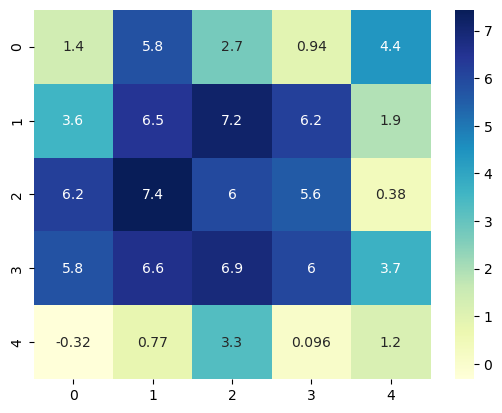

In [3]:
x = np.array([p[i]/k - h[i] for i in range(25)]).reshape(5, 5)

sns.heatmap(x, annot=True, cmap="YlGnBu")
plt.show()

However, people do not see each other's choices. What could be their strategies then? One simple strategy is to compute the ratio of $p_i/h_i$ for each choice and choose the one with the highest ratio.

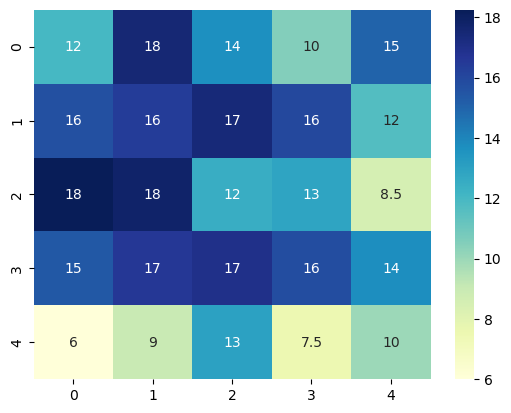

In [4]:
r = np.array([p[i] / h[i] for i in range(25)]).reshape(5, 5)

sns.heatmap(r, annot=True, cmap="YlGnBu")
plt.show()

If people choose the tile completely randomly, the expected payoff for each tile is then $ p_i / (h_i + 4) $

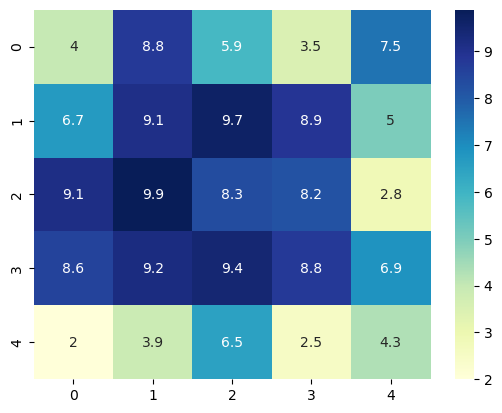

In [5]:
y = np.array([p[i] / (h[i]+4) for i in range(25)]).reshape(5, 5)

sns.heatmap(y, annot=True, cmap="YlGnBu")
plt.show()

If we assume we pick the tiles with some probability distribution $x_1, x_2, ..., x_{25}$, the expected payoff is then
$$E = \sum_{i=1}^{25} x_i \cdot \frac{p_i}{h_i + x_i} $$
And the constraint is $ x_1 + x_2 + ... + x_{25} = 100 $.

Maximize $E$ under the constraint, we can use Lagrange multiplier to solve the problem. The Lagrange function is
$$ L = \sum_{i=1}^{25} x_i \cdot \frac{p_i}{h_i + x_i} + \lambda \cdot (x_1 + x_2 + ... + x_{25} - 100) $$
Take the derivative of $L$ with respect to $x_i$ and $\lambda$, we have
$$ \frac{\partial L}{\partial x_i} = \frac{p_i \cdot h_i}{(h_i + x_i)^2} - \lambda = 0 $$
$$ \frac{\partial L}{\partial \lambda} = x_1 + x_2 + ... + x_{25} - 100 = 0 $$
Solve the equations, we have
$$ x_i = \sqrt{\frac{p_i \cdot h_i}{\lambda}} - h_i $$
Substitute this into the constraint, we have
$$ \sum_{i=1}^{25} \sqrt{\frac{p_i \cdot h_i}{\lambda}} = 100 + \sum_{i=1}^{25} h_i $$
Solve the equation to find
$$ \lambda = \left( \frac{\sum_{i=1}^{25} \sqrt{p_i \cdot h_i}}{100 + \sum_{i=1}^{25} h_i} \right)^2 $$

In [6]:
p = np.array(p)
h = np.array(h)

k = (np.sum(np.sqrt(p * h)) / (100 + np.sum(h)))**2
k

3.5334565455947993

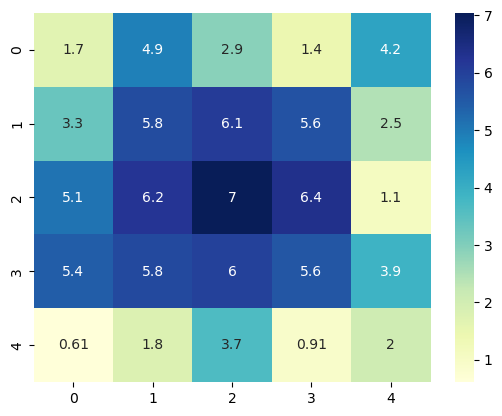

In [20]:
x = np.sqrt((p * h) / k) - h

sns.heatmap(x.reshape(5, 5), annot=True, cmap="YlGnBu")
plt.show()

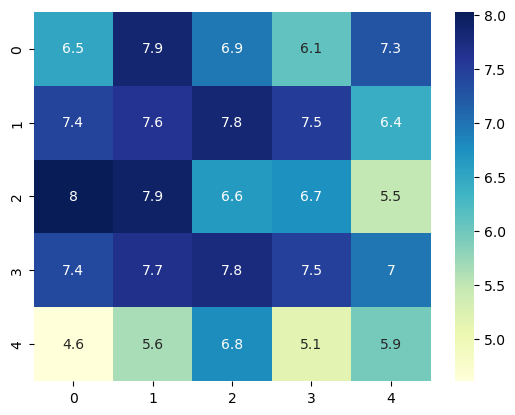

In [19]:
ev = p / (h + x)

sns.heatmap(ev.reshape(5, 5), annot=True, cmap="YlGnBu")
plt.show()

In [30]:
np.random.seed(42)
np.random.choice(np.arange(25),3,p=x/np.sum(x))

array([ 9, 22, 16])